In [8]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

## 1. NIH CT-Scan Dataset

Contains more than 100,000 CT-scans. As mentioned in the [README](https://nihcc.app.box.com/v/DeepLesion/file/306056134060), the images are in int16 values and need to be transformed to their Hounsfield unit values; however, as our images come from PDFs, we should assume they will be in RGB values with 3-channels.

In [3]:
nih_dir = '../samples/nih_ct'
nih_samples = [img_name for img_name in os.listdir(nih_dir)]

In [103]:
def load_ct_image(im_dir, im_name):
    im = cv2.imread(os.path.join(nih_dir, nih_samples[0]), -1)  # -1 is needed for 16-bit image
    # the 16-bit png file has a intensity bias of 32768
    im_t = (im.astype(np.int32) - 32768).astype(np.int16)
    return im_t

def hounsfield_2_rgb(im):
    # normalizing the values between 0, 255 based only on the input image min and max
    # not clear to me what is the range of Hounsfield values, but minmax norm seems like a good option
    im_t = np.double(im)
    out = np.zeros((im_t.shape[0], im_t.shape[1], 3), np.double)
    normalized = cv2.normalize(im_t, out, 1.0, 0.0, cv2.NORM_MINMAX) * 255
    return cv2.cvtColor(normalized.astype('uint8'),cv2.COLOR_GRAY2RGB)

Loading the CT image as any other RGB image is incorrect; a lot of detail is lost (See image top left below). To get a better representation, we need to get the Hounsfield values and then normalize to [0.255]. In addition, convert the gray-scale image to RGB. Although this last step may be unnecessary, for PDF images, we assume there are further annotations in other color maps than just grayscale. 

In [110]:
im_uint8 = cv2.imread(os.path.join(nih_dir, nih_samples[0]))
im_int16 = cv2.imread(os.path.join(nih_dir, nih_samples[0]), -1)
im_int16_t = load_ct_image(nih_dir, nih_samples[0])
im_uint8_t = hounsfield_2_rgb(im_int16_t)

print("uint8   \tmin:{min_},\t max:{max_}".format(min_=im_uint8.min(), max_=im_uint8.max()))
print("int16   \tmin:{min_},\t max:{max_}".format(min_=im_int16.min(), max_=im_int16.max()))
print("int16_t \tmin:{min_},\t max:{max_}".format(min_=im_int16_t.min(), max_=im_int16_t.max()))
print("unt8_t \t\tmin:{min_},\t\t max:{max_}".format(min_=im_uint8_t.min(), max_=im_uint8_t.max()))

uint8   	min:124,	 max:133
int16   	min:31744,	 max:34201
int16_t 	min:-1024,	 max:1433
unt8_t 		min:0,		 max:255


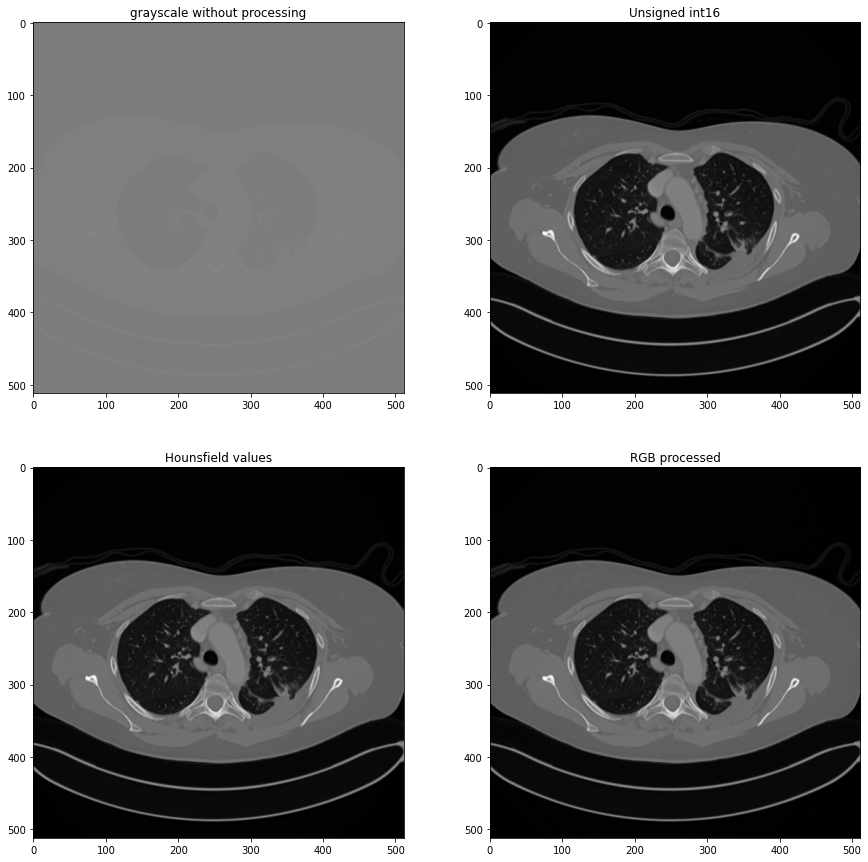

In [111]:
f, axarr = plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(im_uint8, cmap='gray')
axarr[0,0].title.set_text('grayscale without processing')
axarr[0,1].imshow(im_int16, cmap='gray')
axarr[0,1].title.set_text('Unsigned int16')
axarr[1,0].imshow(im_int16_t, cmap='gray')
axarr[1,0].title.set_text('Hounsfield values')
axarr[1,1].imshow(im_uint8_t, cmap='gray')
axarr[1,1].title.set_text('RGB processed')

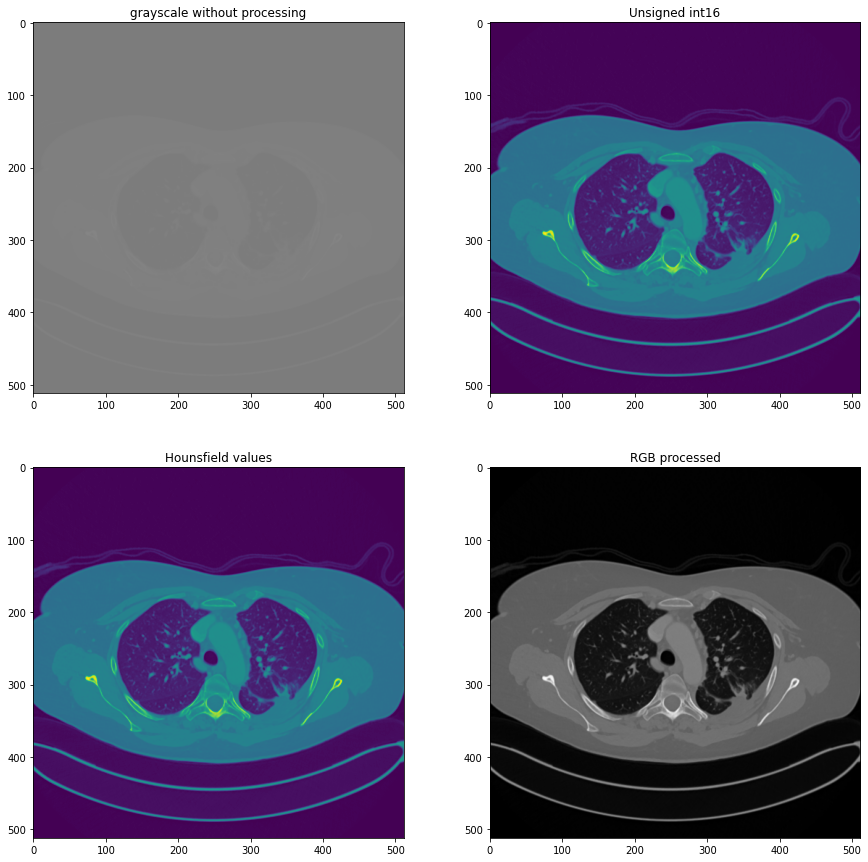

In [112]:
f, axarr = plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(im_uint8)
axarr[0,0].title.set_text('grayscale without processing')
axarr[0,1].imshow(im_int16)
axarr[0,1].title.set_text('Unsigned int16')
axarr[1,0].imshow(im_int16_t)
axarr[1,0].title.set_text('Hounsfield values')
axarr[1,1].imshow(im_uint8_t)
axarr[1,1].title.set_text('RGB processed')